## Machine Learning for Credit Card Fraud Detection

With billions of daily transactions and increased credit card usage via mobile apps, online stores, and digital wallets, fraudsters constantly seek ways to exploit users. To prevent fraudulent charges, credit card companies must detect suspicious transactions.  

I developed a **machine learning classification model** to identify fraud patterns and distinguish genuine transactions. Using **Python’s scikit-learn**, I tested four classification algorithms to determine the most effective one for our dataset.

### 📌 **Dataset Source**
[Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### 🚀 **Classification Algorithms Used**
1. **Decision Tree Classifier** – Predicts target values using simple decision rules.  
2. **Random Forest Classifier** – Constructs multiple random decision trees for robust predictions.  
3. **AdaBoost Classifier** – Boosts weak learners to improve accuracy.  
4. **Gradient Boosting Classifier** – Optimizes predictive performance through sequential learning.  


In [1]:
# Libraries for exploring, handling and visualizing data
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
# Sklearn's preprocessing library
from sklearn.preprocessing import StandardScaler
# Importing train and test data split
from sklearn.model_selection import train_test_split
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# Setting theme style and color palette to seaborn 
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

In [2]:
# Importing the csv(From Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
df = pd.read_csv("creditcard.csv") 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 🧐 Understanding the Dataset

- 📌 **Used** `pandas.read_csv()` to load the **Credit Card Fraud Detection** dataset from Kaggle.  
- 📊 **Dataset Overview:**  
  - **284,807 transactions** from clients (**Sept 2013, 2 days**).  
  - Contains **30 variables**.

### 🔑 **Key Features:**
- **Time**: Seconds elapsed since the first transaction.  
- **Amount**: Transaction value.  
- **Class**: Binary indicator (**genuine** or **fraud**).  
- **V1-V28**: PCA-transformed numerical features (**confidential**).

### 📊 **Data Exploration Findings:**
- Contains **only numerical inputs**.  
- **No null values** present.  
- Used **`describe()`** to analyze the **Amount** feature.  


In [3]:
df.isna().values.any()

np.False_

In [4]:
#Analysing Stats 
df.Amount.describe().round(2)

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

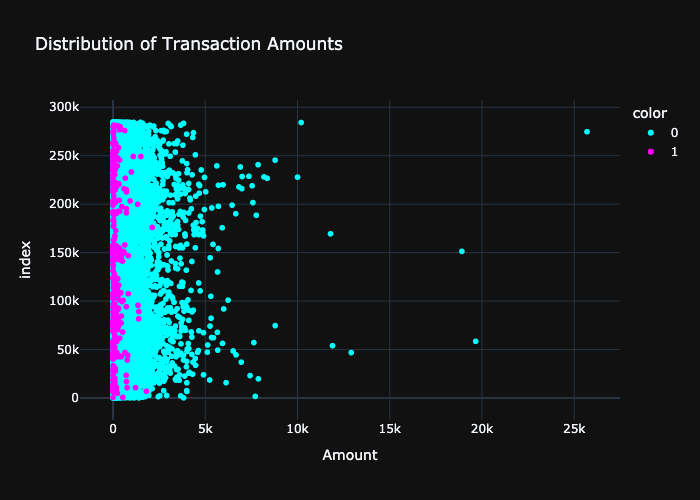

In [5]:
import plotly.express as px

# Create Scatter Plot with Dark Background
scatterPlot = px.scatter(df, x="Amount", y=df.index, color=df["Class"].astype(str),
                         title="Distribution of Transaction Amounts",
                         color_discrete_sequence=["#00FFFF", "#FF00FF"])  # Custom colors


scatterPlot.update_layout(template="plotly_dark")


scatterPlot.show("png")


## 🔍 Class Distribution Analysis  

- ✅ **Most transactions are genuine**, with no fraudulent ones exceeding **€5,000**.  
- ⚠️ **Fraudulent transactions (yellow dots)** are barely visible on the scatter plot, hidden among the dense blue dots.  
- 📊 To better understand the class distribution, **used Plotly** to create a **pie chart**.  


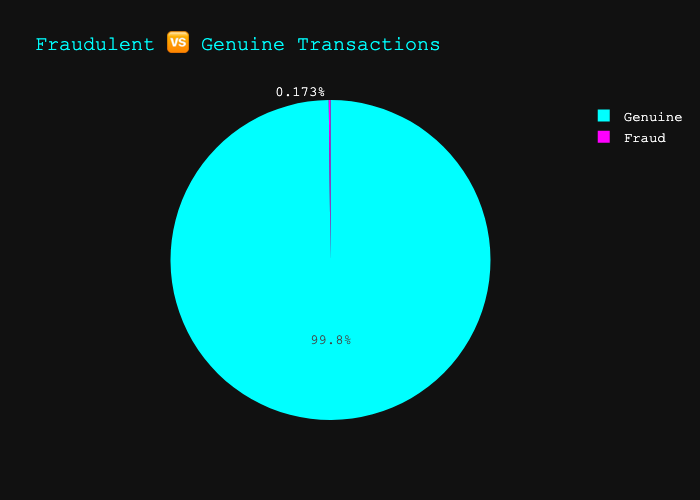

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
    #Class Distribution (0 TO 1) as of PieChart, Also for this data Fraud x Genuine
    pieChart = px.pie(df.Class,values = df.Class.value_counts(),
                names=['Genuine', 'Fraud'],
                title='Fraudulent 🆚 Genuine Transactions',
                color_discrete_sequence=["#00FFFF", "#FF00FF"],
                
            )
    pieChart.update_layout(
                template="plotly_dark",  
                title_font=dict(size=20, color="cyan"),  
                font=dict(family="Courier New, monospace", size=14, color="white"),  
                paper_bgcolor="#111111",  
                plot_bgcolor="#222222", 
            )

    pieChart.show("png")

    #Exact numbers
    df.Class.value_counts()


## 📉 Class Imbalance in Fraud Detection  

- 🔎 **Fraudulent transactions are extremely rare**, making up only **0.17%** of the dataset.  
- 💳 **492 out of 284,807 transactions** were fraudulent.  
- ⚠️ **Severe class imbalance** presents a challenge for model training.  

### 📊 **Next Step:**  
Let's analyze fraudulent transactions further to extract more insights!  


In [7]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

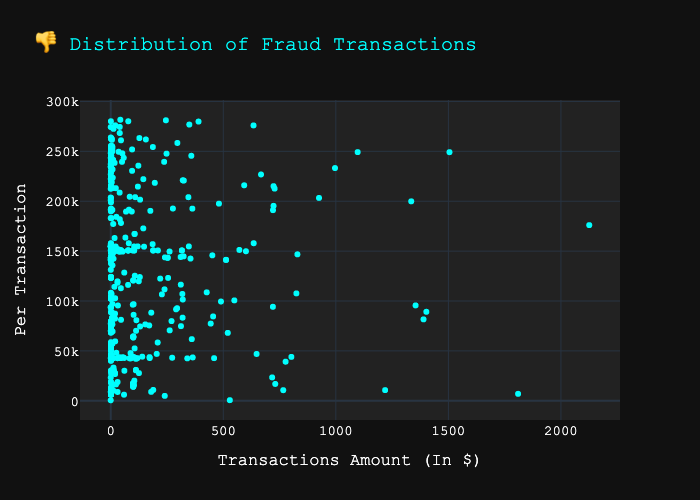

In [8]:
# More analysis on Fraud transactions
fraud_df = df.query("Class == 1")

scatterPlot = px.scatter(
    fraud_df, x="Amount", y=fraud_df.index,
    title="👎 Distribution of Fraud Transactions",
    color_discrete_sequence=["#00FFFF", "#FF00FF"]  
)

scatterPlot.update_layout(
    xaxis_title="Transactions Amount (In $)", 
    yaxis_title="Per Transaction",
    template="plotly_dark",
    font=dict(family="Courier New, monospace", size=14, color="white"), 
    title_font=dict(size=20, color="cyan"),
    paper_bgcolor="#111111",  
    plot_bgcolor="#222222"
)

scatterPlot.show("png")


In [9]:
df = df.drop(columns = ['Time'], axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
#I divided the dataset into the independent variables (X) and the target variable (y)
X = df.drop(columns=['Class'], axis=1)
y = df.Class

## ✂️ Splitting the Dataset  

- 📊 **Data split**: **80% for training** and **20% for testing**.  
- 🎯 This ensures the model learns patterns effectively while maintaining a separate set for evaluation.  


In [11]:
#train to test split(80:20)
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size= .2, random_state = 123)

In [12]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)

X Train size:  (227845, 29)
X Test size:  (56962, 29)
Y Train size:  (227845,)
Y Test size:  (56962,)


In [13]:
#checking the duplicates
duplicates = train_x.merge(test_x, how="inner")
print(f"Duplicates between train & test: {len(duplicates)}")

Duplicates between train & test: 12119


## Feature Scaling with StandardScaler  

- 🔄 **Used `StandardScaler`** to normalize the **Amount** values.  
- ⚠️ **Why?**  
  - Ensures all features are on a **similar scale**, preventing bias.  
  - Avoids **larger-scale variables dominating** the model, leading to skewed results.  
- 🏗 **How it works?**  
  - **Standardization**: Subtracts the **mean** and divides by the **standard deviation**.  
- 🔒 **To prevent data leakage**, `StandardScaler` must be applied **separately** to the training and testing sets.  


In [14]:
# Scaling data on the training set
scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))


In [15]:
# Scaling data on the testing set
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))

##  Handling Class Imbalance with SMOTE  

- **Used `imblearn` library** to apply **SMOTE** (Synthetic Minority Over-sampling Technique).  
- 🔄 **What does SMOTE do?**  
  - **Oversamples fraudulent transactions** by synthetically generating more fraud cases.  
  - Balances the dataset by creating **new fraud samples** based on existing ones.  
- **Before applying SMOTE**, let's review the distribution of fraudulent and genuine transactions.  


In [16]:
#Reshaping the data 
from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y) 

In [ ]:
#Finally Random Forest classifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(train_x,train_y)
y_predictions_rf = random_forest.predict(test_x)

# Applying Decision Tree Classifier 

decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(train_x,train_y)
 
y_predictions_dt = decision_tree.predict(test_x)

# Applying Ada Boost Classifier 
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(train_x,train_y)
 
y_predictions_ab = ada_boost.predict(test_x)

# Applying Gradient Boosting Classifier 
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_y)
 
y_predictions_gb = gradient_boosting.predict(test_x)



# 📊 Evaluation Metrics for Classification Models  

To assess **model performance**, we use several key evaluation metrics:  

## 🔢 Confusion Matrix  
The **Confusion Matrix** compares **predicted vs. actual** values in binary classification:  

- **TP (True Positive):** ✅ Correctly predicted positive cases.  
- **FP (False Positive):** ❌ Incorrectly predicted positive cases.  
- **FN (False Negative):** ❌ Incorrectly predicted negative cases.  
- **TN (True Negative):** ✅ Correctly predicted negative cases.  

---

## 📌 Other Key Metrics  

✅ **Accuracy**: Proportion of correct predictions.  
   $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$  

✅ **Precision**: Measures how often positive predictions are correct.  
   $$ \text{Precision} = \frac{TP}{TP + FP} $$  

✅ **Recall (Sensitivity)**: Measures how well the model detects actual positives.  
   $$ \text{Recall} = \frac{TP}{TP + FN} $$  

✅ **F1 Score**: Harmonic mean of precision and recall for balanced evaluation.  
   $$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$  


In [ ]:
#checking the Matrices for Random Forest

metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_rf))],
           ['Precision',precision_score(test_y, y_predictions_rf)],
           ['Recall', recall_score(test_y, y_predictions_rf)],
           ['F1_score',f1_score(test_y, y_predictions_rf)]]

metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df



,Metrics,Results
0,Accuracy,0.999403
1,Precision,0.864865
2,Recall,0.834783
3,F1_score,0.849558


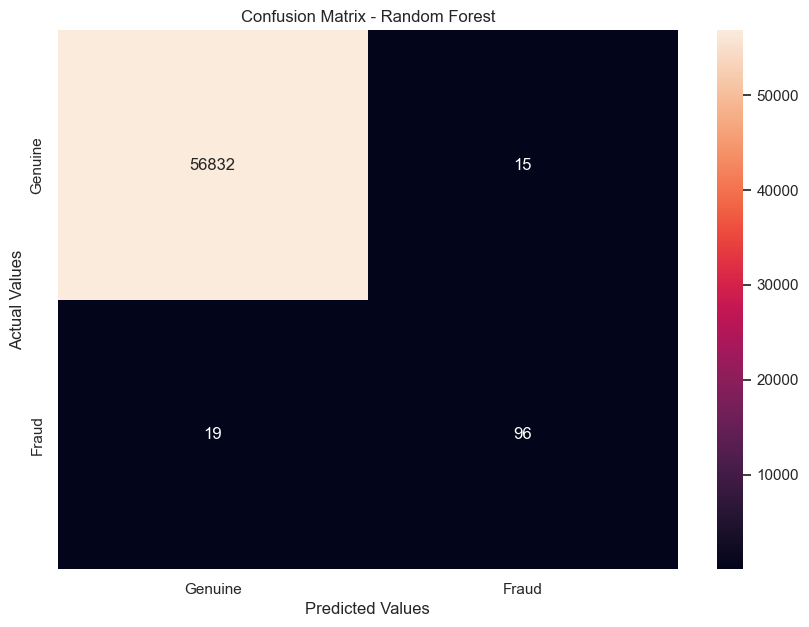

In [ ]:
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualization for Random forest
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show("png")

In [ ]:

#checking the Matrices for Decision Tree Classifier

metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_dt))],
           ['Precision',precision_score(test_y, y_predictions_dt)],
           ['Recall', recall_score(test_y, y_predictions_dt)],
           ['F1_score',f1_score(test_y, y_predictions_dt)]]

metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df



,Metrics,Results
0,Accuracy,0.997209
1,Precision,0.404348
2,Recall,0.808696
3,F1_score,0.539130


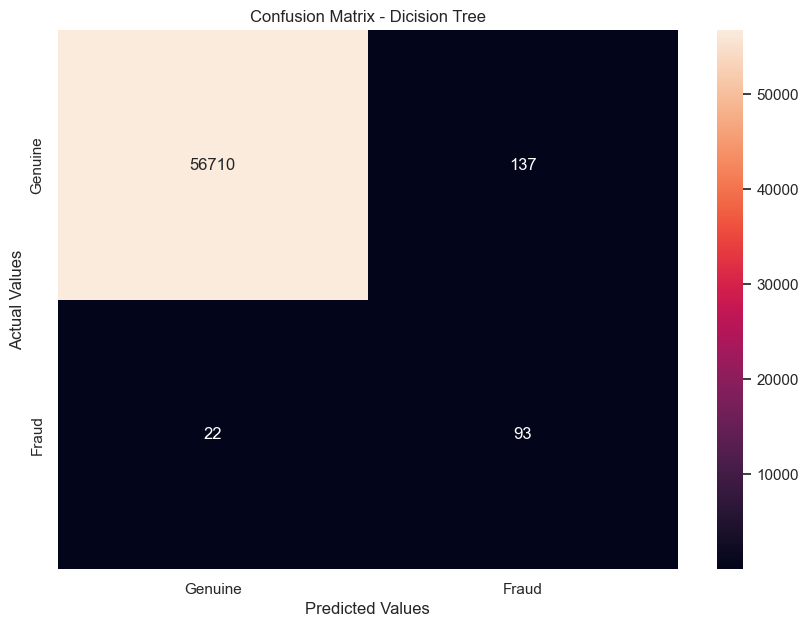

In [ ]:
confusion_matrix_dt = confusion_matrix(test_y, y_predictions_dt)
# Visualization for Decision Tree Classifier
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Dicision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show("png")

In [ ]:

#checking the Matrices for Ad Boost Classifier


metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_ab))],
           ['Precision',precision_score(test_y, y_predictions_ab)],
           ['Recall', recall_score(test_y, y_predictions_ab)],
           ['F1_score',f1_score(test_y, y_predictions_ab)]]

metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df



,Metrics,Results
0,Accuracy,0.971736
1,Precision,0.062610
2,Recall,0.930435
3,F1_score,0.117325


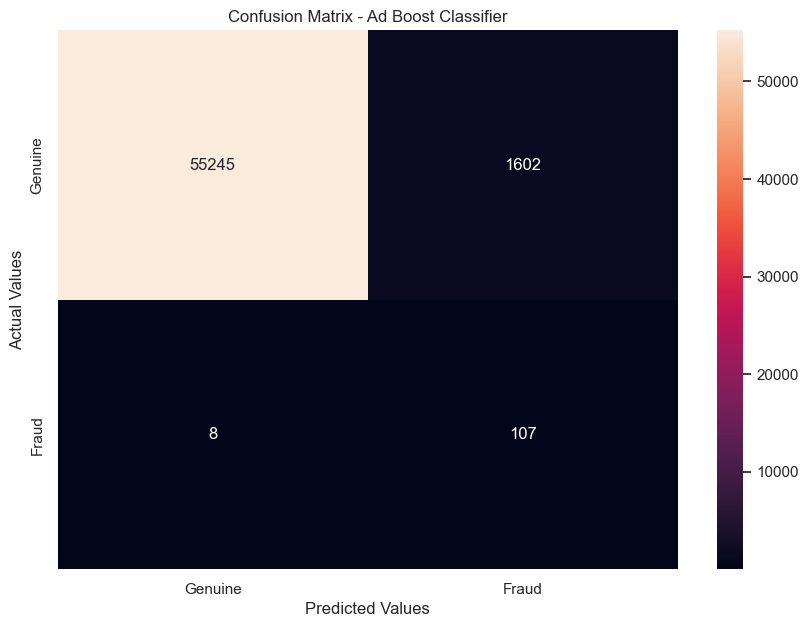

In [ ]:
confusion_matrix_ab = confusion_matrix(test_y, y_predictions_ab)
# Visualization Ad Boost Classifier
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Ad Boost Classifier')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show("png")

In [ ]:

#checking the Matrices for Gradient Boosting Classifier


metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_gb))],
           ['Precision',precision_score(test_y, y_predictions_gb)],
           ['Recall', recall_score(test_y, y_predictions_gb)],
           ['F1_score',f1_score(test_y, y_predictions_gb)]]

metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df



,Metrics,Results
0,Accuracy,0.987922
1,Precision,0.135032
2,Recall,0.921739
3,F1_score,0.235556


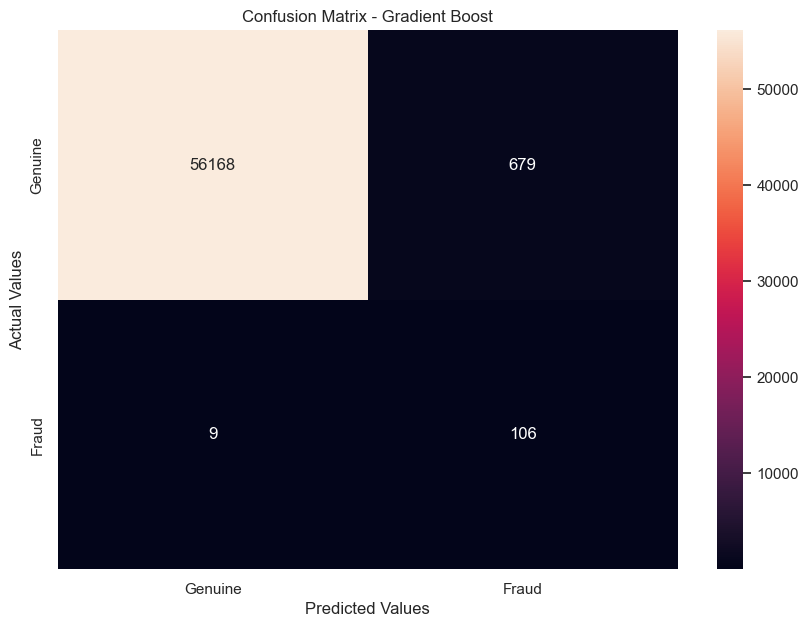

In [ ]:
confusion_matrix_gb = confusion_matrix(test_y, y_predictions_gb)
# Visualization Gradient Boosting Classifier
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Gradient Boost')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show("png")

In [ ]:
# Counting how many fraudulent and how many genuine transactions we have on the testing set
test_y.value_counts()

Class
0    56847
1      115
Name: count, dtype: int64

# 📌 Findings from the Credit Card Fraud Detection Analysis  

The evaluation of multiple classification models on the **Credit Card Fraud Detection** dataset provided key insights into their performance based on **accuracy, precision, recall, and F1 score**, along with an analysis of their **confusion matrices**.  

## 🔍 Model Performance Analysis  

### 1️⃣ **Random Forest Classifier** 🌳  
- ✅ **Effectively detected fraudulent transactions** while keeping false positives low.  
- ⚖️ Maintained a **good balance between precision and recall**, making it a strong choice for real-world applications.  

### 2️⃣ **Decision Tree Classifier** 🌲  
- ⚠️ **Overfitting tendencies**, making it less reliable compared to ensemble models.  
- 📉 Performed moderately well but had a **higher rate of false positives and false negatives**.  

### 3️⃣ **AdaBoost Classifier** 🚀  
- 🎯 **Highest recall (91.87%)**, successfully identifying most fraudulent transactions.  
- ⚠️ **Downside**: **Highest false positive rate** (**1.54% of genuine transactions mislabeled as fraud**), which could lead to customer dissatisfaction.  

### 4️⃣ **Gradient Boosting Classifier** 📈  
- ✅ **Balanced fraud detection and minimized false positives**.  
- 🔍 While recall was slightly lower than AdaBoost, it had **higher precision**, making it **more reliable** in reducing false alerts.  

---

## 🔎 **Observations on Class Imbalance**  
- 📉 The dataset exhibited a **severe class imbalance**, with fraudulent transactions making up **only a small fraction** of the total.  
- 🎯 **Recall was a critical metric**, ensuring fraudulent cases were correctly identified while keeping false positives in check.  

---

## ✅ **Key Takeaways**  
- **If maximizing fraud detection is the goal** → **AdaBoost** is the most effective choice.

- **If minimizing false positives is a priority** → **Random Forest** or **Gradient Boosting** are better options. 

- 🔄 **A hybrid approach** using **ensemble methods & threshold tuning** could help **improve fraud detection while reducing false alarms**.
  
- ⚖️ **Balancing fraud detection and customer experience** is crucial:  
  - **Too many false positives** → Unnecessary **transaction blocks**.  
  - **Missing fraud cases** → Potential **financial losses**.  
